# [Titanic](https://www.kaggle.com/c/titanic)

## Data Description

* row : passenger
* col : features like passengers`s gender and class
* target : 'ground truth'
* 필사 Link : [EDA To Prediction(DieTanic)](https://www.kaggle.com/code/ash316/eda-to-prediction-dietanic/notebook)

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

plt style 중 사용 가능한 것들을 출력해 줍니다.

In [ ]:
print(plt.style.available)
plt.style.use('seaborn-dark')

## Load Data

In [ ]:
train_path  = 'data/train.csv'
test_path  = 'data/test.csv'
sample_path = 'data/gender_submission.csv'
data = pd.read_csv(train_path)
data.head(10)

In [ ]:
data.isnull().sum()

In [ ]:
fig, axes = plt.subplots(1,2,figsize= (18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct = '%1.1f%%',ax = axes[0], shadow = True)
axes[0].set_title('Survived')
axes[0].set_ylabel('')
sns.countplot('Survived', data=data, ax = axes[1])
axes[1].set_title('Survived')
plt.show()

In [ ]:
# Study
print(data['Survived'].value_counts())
print(type(data['Survived'].value_counts()))
print(data['Survived'].value_counts().index)
print(data['Survived'].value_counts().values)
print(data['Survived'].count())

Series의 value_counts()의 type은 여전히 Series 입니다.  
이는 해당 value 값이 index로 들어가고 counts 가 value로 들어간 Series 형태이기 때문입니다.

변화 전 axes.shape : (2, 2)
변화 후 axes.shape : (4,)


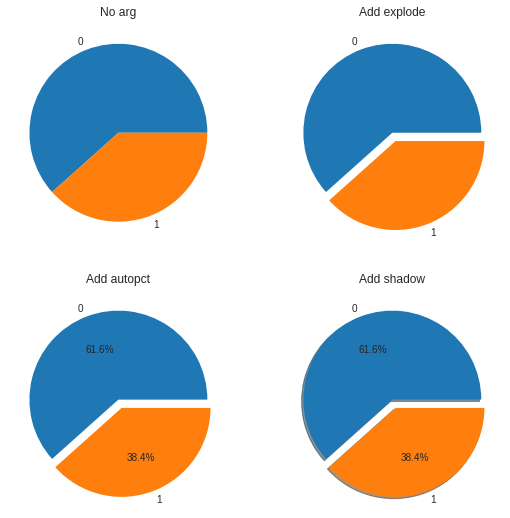

In [12]:
# Study
title_name = ['No arg','Add explode','Add autopct','Add shadow']
fig, axes = plt.subplots(2,2,figsize= (9,9))
print('변화 전 axes.shape :', axes.shape)
axes = axes.flatten()
print('변화 후 axes.shape :', axes.shape)
data['Survived'].value_counts().plot.pie(ax = axes[0])
data['Survived'].value_counts().plot.pie(explode=[0,0.1],ax = axes[1])
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct = '%1.1f%%',ax = axes[2])
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct = '%1.1f%%',ax = axes[3], shadow = True)

for i, ax in enumerate(axes):
    ax.set_ylabel('')
    ax.set_title(title_name[i])

plt.show()

# 넣어주는 인자값을 따로 가져와서 title로 만들고자 했었으나 불가능
# 퍼실님 tip : 딕셔너리 형태로 함수의 argument를 넣을 수 있다. 매개변수 : 인자
# 넣을 때는 **딕셔너리이름
# dicts = {'explode':[0,0.1], 'autopct'  : '%1.1f%%'}
# data['Survived'].value_counts().plot.pie(**dicts[:1],ax = axes[0])
# data['Survived'].value_counts().plot.pie(**dicts,ax = axes[0])


* 작성 방법
  1. 그래프들의 제목들을 리스트로 저장합니다.
  2. 4개의 그래프를 위해 공간 (2,2)를 subplots로 지정합니다.
  3. iterative 하게 사용하기 위해 ax 를 flatten 합니다. [numpy flatten](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.flatten.html)
  4. flatten 해줬으므로 1차원으로 ax로 설정합니다.(하지만 그래프는 여전히 2,2 로 나옵니다)
  5. 그래프마다 인자값을 다르게해서 넣어줍니다.
  6. enumerate를 사용해서 ax를 순차적으로 접근하여 전체 그래프의 ylabel을 비워줍니다.
  7. enumerate를 사용해서 ax의 index 값을 제목 리스트의 index로 활용합니다.

In [13]:
print(axes)
print(axes[0])
print(type(axes))
print(type(axes[0]))

[<AxesSubplot:title={'center':'No arg'}>
 <AxesSubplot:title={'center':'Add explode'}>
 <AxesSubplot:title={'center':'Add autopct'}>
 <AxesSubplot:title={'center':'Add shadow'}>]
AxesSubplot(0.129545,0.536818;0.343182x0.343182)
<class 'numpy.ndarray'>
<class 'matplotlib.axes._subplots.AxesSubplot'>


* ax를 2차원 배열로 만들어주게되면 ndarray로 됩니다.  
(물론 내부 데이터는 AxeSubplot 입니다.)
* 지금은 flatten을 적용해서 shape가 (2,2) 에서 (4,) 으로 변합니다.  

이제 그래프에 들어간 파라미터들을 알아봅니다.  
[pandas pie](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html)  
[matplotlib pie](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html)

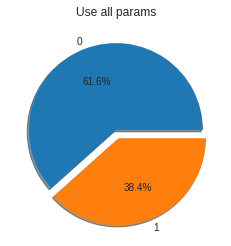

In [18]:
fig, axes = plt.subplots()
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct = '%1.1f%%', shadow = True)
plt.title('Use all params')
plt.ylabel('')
plt.show()

* explode : 파이 사이 빈 간격을 만들어줍니다.
* autopct : 파이 공간 내부에 숫자를 적어줍니다.
* shadow : 그림자.

pandas 의 pie 는 matplotlib 의 pie의 기능을 가져온 것 입니다.